# Linear regression

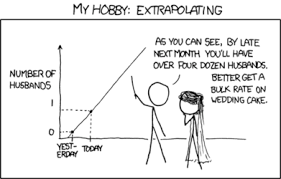


In [1]:
%%capture
!pip install statsmodels
!pip install sklearn

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
import statsmodels.formula.api as smf # welcome!!
from sklearn.linear_model import LinearRegression

import pandas as pd
np.random.seed(123)

# Table of Contents

## Simple linear regression

Simple linear regression an statistical model that assumes a linear relationship between one predictor and one target variable. Mathematically, this can be expressed as:

 $$ Y = \beta_0 +  \beta_1 X + \epsilon$$

Where:
 * $X$ = predictor variable
 * $Y$ = target variable
 * $\beta_0$ = intercept
 * $\beta_1$ = slope
 * $\epsilon$ = noise (Gaussian)


The above equation is known as the *population regression line*.

In [3]:
# From the example in the previous class
beta_1 =  0.08#0.08
beta_0 = 12
num_points = 100
X = np.random.normal(600, 150, num_points) # study hours

# And the grades are...
y = beta_0 + (beta_1 * X) + np.random.normal(loc=0, scale=5, size=num_points)
data = pd.DataFrame({'grade': y,
                     'hours': X})

In [4]:
data

,grade,hours
0,50.182706,437.155410
1,62.078706,749.601817
2,66.957065,642.446775
3,54.915983,374.055793
4,52.933667,513.209962
...,...,...
95,56.218098,754.667169
96,45.638718,437.314813
97,43.084088,395.479268
98,62.846499,656.910092


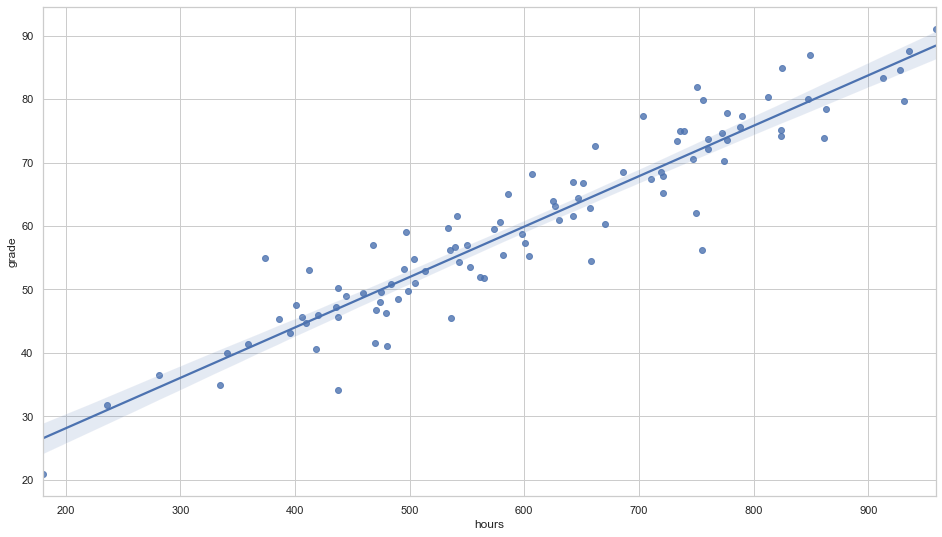

In [5]:
sns.regplot(x='hours', y='grade', data=data);

Of course, in the real life we don´t know the true parameters of the model, neither if the model is real!!! Today we´ll learn a [valuable lesson](https://en.wikipedia.org/wiki/All_models_are_wrong):



<center> <b>"All models are wrong, but some are useful"</b> </center>


In practice what we do is, after seing an scatter plot as the one above, try to infer the parameters of the model $\beta_0$ and the slope, $\beta_1$.  Once they are estimated, the estimated fit becomes $$ \hat{Y} = \hat{\beta_0} +  \hat{\beta_1} X$$

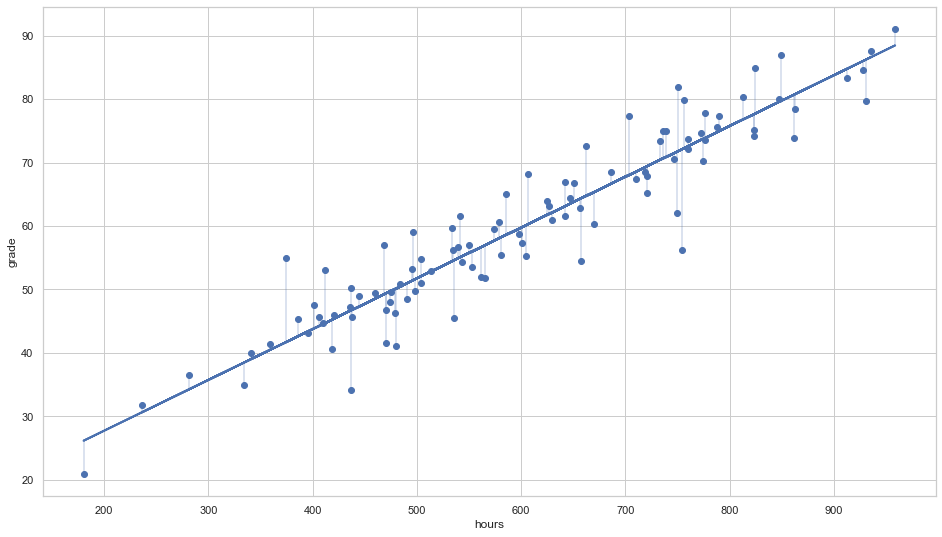

In [6]:
# regression line
y_hat = 11.75 + 0.08 * X
# plot the linear fit on top of the scatter
plt.scatter(X, y)
plt.plot(X, y_hat, lw=2)
plt.vlines(X, y_hat, y, lw=0.4)
plt.xlabel('hours')
plt.ylabel('grade')
plt.show()


The numeric difference between the *least squares regression line* and the true value is called the *residual*, and represents the error in the estimate: $e = y_i  - \hat{y}$. The regression line minimized the *Residual Sum of Squares* (RSS): $$RSS = e_1^2 + e_2^2 + \dots + e_n ^2$$



### How good are our estimates?

The theory stablishes that the coefficients we find via the least squares method are **unbiased**, that is, the don´t systematically over or underestimate the true values.

There are also formulas to estimate the **Standard Error** of the estimates $SE(\hat{\beta_0})$ and $SE(\hat{\beta_1})$, from which we can obtain the $95\%$ confidence intervals as:


$$\hat\beta \pm 2*SE(\hat{\beta})$$



In [7]:
lr = LinearRegression()

In [8]:
#generate data
beta_1_hat_dist = []
beta_0_hat_dist = []

for _ in range(1000):
    beta_1 =  0.08
    beta_0 = 12
    num_points = 100
    X = np.random.normal(600, 150, num_points) # study hours

    # And the grades are...
    y = beta_0 + (beta_1 * X) + np.random.normal(loc=0, scale=5, size=num_points)
    data = pd.DataFrame({'grade': y,
                         'hours': X})
    # Compute confidence intervals with the resampling technique (will check results later)
    lr.fit(X=data.hours.to_frame(),
           y=data.grade)

    beta_1_hat_dist.append(lr.coef_[0])
    beta_0_hat_dist.append(lr.intercept_)

In [9]:
# confidence intervals
params = beta_1_hat_dist
i_min = pd.Series(params).quantile(0.025)
i_max = pd.Series(params).quantile(0.975)
print(f'The 95% confidence interval is: {np.round(i_min,3), np.round(i_max, 3)}')

The 95% confidence interval is: (0.074, 0.086)


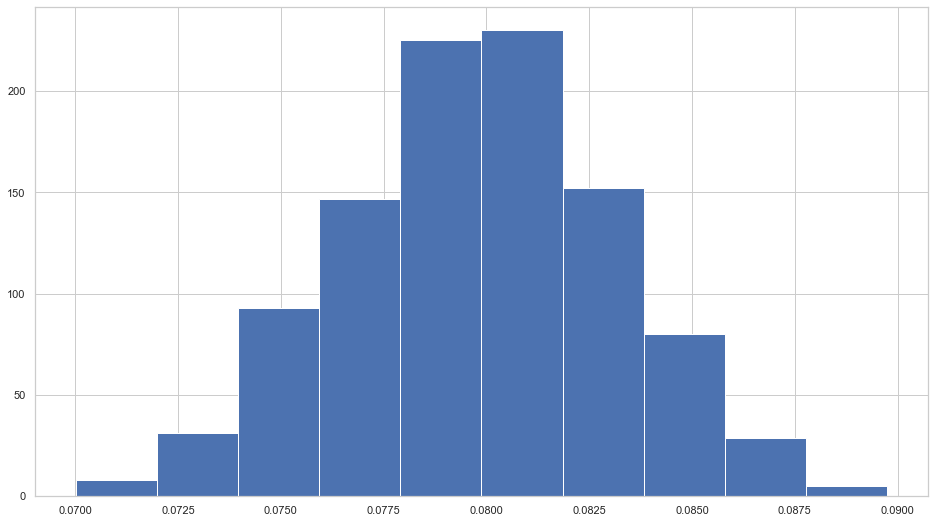

In [10]:
plt.hist(params)
plt.show()

### Can we safely conclude that there is a true relationship between X and y?


If the standard error is large and the estimated value small we can not be sure that its true value is really different from zero --- i.e. not statistically significant. Luckily for us we know about Hypothesis testing!!


* Null hypothesis $H_0: \beta_1 = 0 $
* Alternative hypothesis $H_a: \beta_1 \ne 0$

To test this we compute a *t-statistic* which measures the how many standard errors our parameter is away from 0:

$$t=\frac{\hat{\beta_1}}{SE(\hat{\beta_1})}$$


Statisticians have worked out what the distribution of this statistic is under the null hypothesys --- a t-distrubution, not very imaginative. Knowing this distribution we ca determine the probability our results are due to chance. You alredy know that, we can calcualte the **p-value**.

**CAUTION!** here is another [video](https://www.youtube.com/watch?v=0Rnq1NpHdmw) to remind you the dangers of the p-values: 

In [11]:
# From the example in the previous class
beta_1 =  0.08 #0.08
beta_0 = 12
num_points = 100
X = np.random.normal(600, 150, num_points) # study hours

# And the grades are...
y = beta_0 + (beta_1 * X) + np.random.normal(loc=0, scale=5, size=num_points)
data = pd.DataFrame({'grade': y,
                     'hours': X})

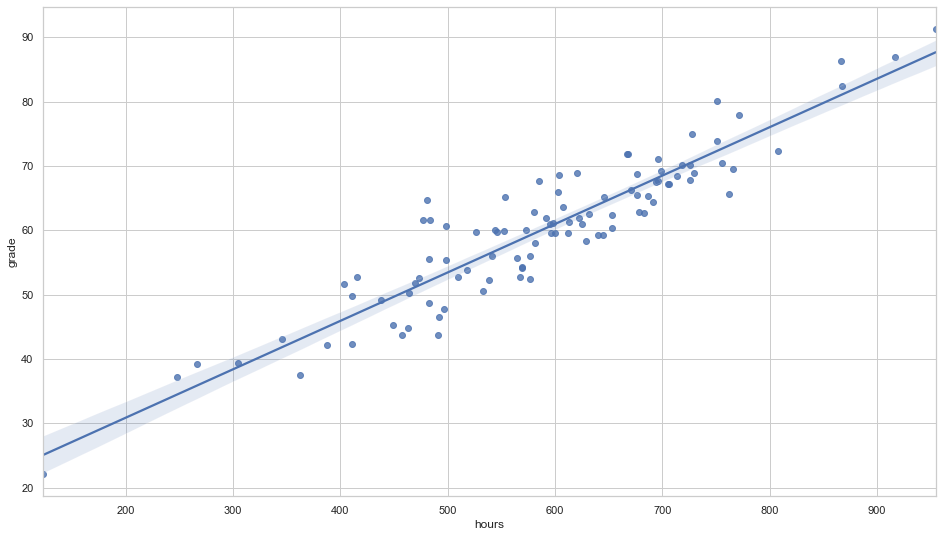

In [12]:
sns.regplot(x='hours', y='grade', data=data);

In [13]:
# Based on the distributions found 
params = beta_1_hat_dist
i_min = pd.Series(params).quantile(0.025)

### How good is our model?
No matter how significant our parameters are... if the model is terrible! 


If just use the mean as the predicted value for each predicion, the error we would make is (*total sum of squares*):

$$TTS=\Sigma(y_i - \bar{y}_i)^2$$

We will consider this our baseline.

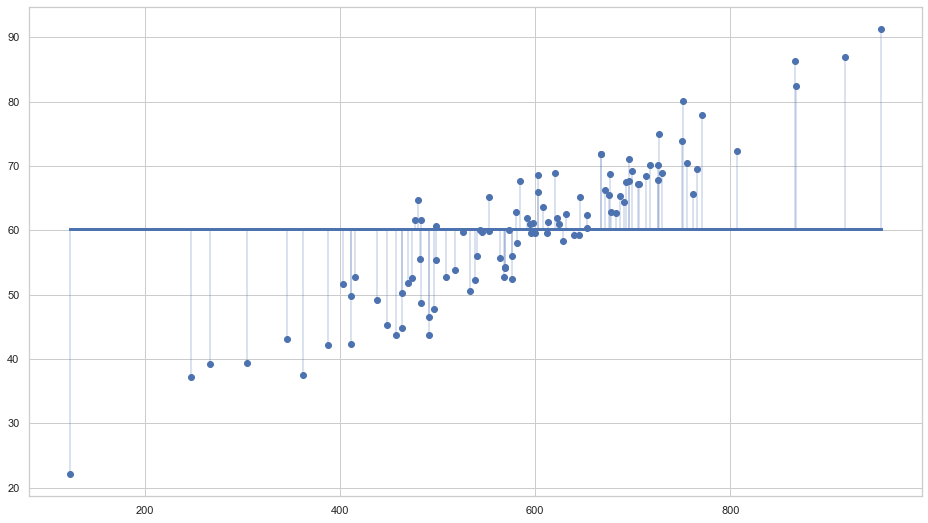

In [14]:
# show mean prediction
mean_prediction = [data.grade.mean()] * num_points
plt.scatter(X, y)
plt.plot(X, mean_prediction, lw=3)
plt.vlines(X, mean_prediction, y, lw=0.4)
plt.show()

In [15]:
# Calculate TSS for the above model
TSS = ((data.grade - mean_prediction) ** 2).sum()
TSS

12878.884745984724

Recall that the coeficients of the linear regression minimize the $RSS=\Sigma(y_i - \hat{y_i})^2$, that is, the amount of variability that is left unexplained after performing the regression. The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination):

$$R^2 = \frac{TSS -RSS}{TSS} = 1- \frac{RSS}{TSS}$$

measures the "*proportion of variability in Y that can be explained using X*". It is a measure of the linear relationship that exists between $X$ and $y$.

**Note:** in the case of simple linear regression, the $R^2$ coefficient is just the squeared of the *Pearson´s* correlation coefficient we already know. 

In [16]:
# Calculate the R^2 of the above model

lr.fit(X=data.hours.to_frame(), y=data.grade)
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
    
y_hat = beta_0 + beta_1 * data.hours

RSS = ((data.grade - y_hat) ** 2).sum()

In [17]:
beta_1

0.07532372522175954

In [18]:
# R^2
(TSS - RSS) / (TSS)

0.8579044786158855

### Linear regression with statsmodels

To analyse linear models, we will be using the [statsmodels library](http://statsmodels.sourceforge.net/) which gives us a lot information  in a simple summary, and integrates nicely with pandas.

In [19]:
results = smf.ols('grade ~ hours', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     591.7
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           2.60e-43
Time:                        12:49:14   Log-Likelihood:                -287.24
No. Observations:                 100   AIC:                             578.5
Df Residuals:                      98   BIC:                             583.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.7831      1.873      8.424      0.000      12.065      19.501
hours          0.0753      0.003     24.324      0.000       0.069       0.081
==============================================================================
Omnibus:                        3.642   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.162   Jarque-Bera (JB):                3.568
Skew:                           0.456   Prob(JB):                        0.168
Kurtosis:                       2.849   Cond. No.                     2.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multiple linear regression

Of course, the hours one studies is not the only important factor to get good grades. We can think of IQ, for example, as another determining factor. In fact, we can generalize a linear model to have as many variables as we want:

 $$ Y = \beta_0 +  \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_2 X_m   + \epsilon$$


In [20]:
# From the example in the previous class
beta_2 = -0.02 # party hours
beta_1 = 0.08 #0.08 # hours studying
beta_0 = 11.75
num_points = 100
X_1 = np.random.normal(500, 200, num_points)
X_2 = np.random.normal(500, 200, num_points)

#
y = (beta_0) + (beta_1 * X_1) + (beta_2 * X_2)  + (np.random.normal(loc=0,scale=5,size=num_points))

In [21]:
data = pd.DataFrame({'grades':y, 
                     'study_hours': X_1,
                     'party_hours': X_2})

In [22]:
data

,grades,study_hours,party_hours
0,21.137187,251.876922,631.949658
1,39.729448,453.114167,528.033116
2,52.423200,594.307050,361.657413
3,43.411710,605.569393,602.621791
4,13.527008,191.436220,410.216518
...,...,...,...
95,65.994383,723.228693,693.498197
96,56.084981,687.479364,478.855086
97,33.503204,358.321376,287.768620
98,42.989335,420.797937,229.090229


The coefficients of the multiple linear regression are computed similar to the simple linear regression case: they minimize:

$$RSS = \Sigma(y_i - \hat{y_i})^2$$


where:

 $$ \hat{y} = \hat{\beta_0} +  \hat{\beta_1 X_1} + \hat{\beta_2} X_2 + \dots + \hat{\beta_2} X_m$$


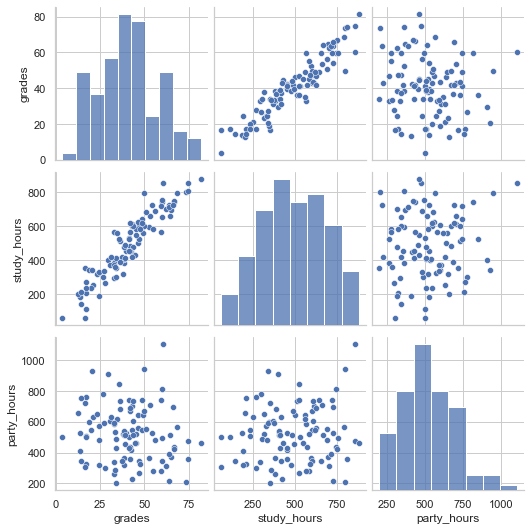

In [23]:
sns.pairplot(data);

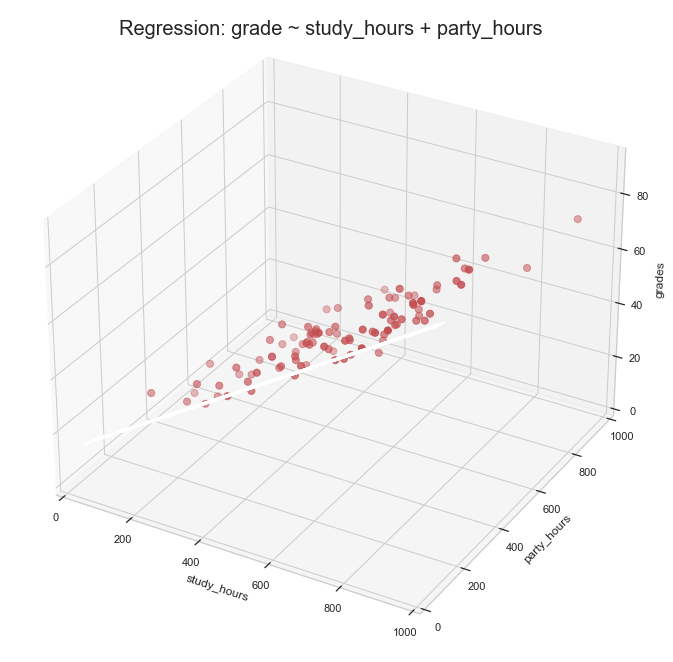

In [24]:
# Create plot
hours = np.arange(0,1000)
iq = np.arange(80,120)

B1, B2 = np.meshgrid(hours, iq, indexing='xy')
Z = np.zeros((iq.size, hours.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =(beta_0 + B1[i,j]*beta_1 + B2[i,j]*beta_2)

fig = plt.figure()
fig.suptitle('Regression: grade ~ study_hours + party_hours', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, cmap=cm.coolwarm, alpha=0.01, )
ax.scatter3D(X_1, X_2, y , c='r', s=50)

ax.set_xlabel('study_hours')
ax.set_xlim(0,1000)
ax.set_ylabel('party_hours')
ax.set_ylim(ymin=0, ymax=1000)
ax.set_zlabel('grades');

In [25]:
results = smf.ols('grades ~ study_hours + party_hours', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     555.1
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           7.79e-54
Time:                        12:49:19   Log-Likelihood:                -295.56
No. Observations:                 100   AIC:                             597.1
Df Residuals:                      97   BIC:                             604.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.7907      1.817      6.488      0.000       8.184      15.398
study_hours     0.0812      0.002     33.001      0.000       0.076       0.086
party_hours    -0.0202      0.003     -7.603      0.000      -0.025      -0.015
==============================================================================
Omnibus:                        0.302   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.436
Skew:                          -0.115   Prob(JB):                        0.804
Kurtosis:                       2.772   Cond. No.                     2.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The null hypothesis expands here to say that all coefficients are equal to 0. The alternative is only that at least one of them is significant. An F test is performed to test for significance.
$$ F = \frac{(SST - SSE)/p}{SSE / (n - p - 1)}$$

### Hands on exercise!

In [26]:
df_adv = pd.read_csv('../datasets/Advertising.csv')

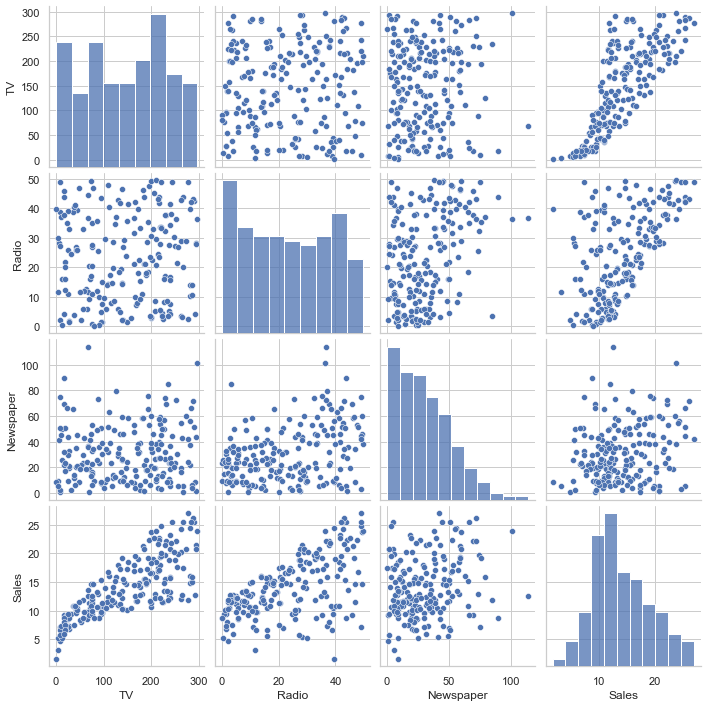

In [27]:
sns.pairplot(df_adv); 

In [28]:
df_adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


* Create three independent simple linear regression models
    * Interpret the results
* Create a multivariate model with all three predictors
    * Interpret the results
**Note** pay special attention to the significance of the `Newspaper variable`.

In [29]:
# Your code here

In [30]:
# Sales ~ TV
results = smf.ols('Sales ~ TV', data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.47e-42
Time:                        12:49:25   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Sales ~ Radio
results = smf.ols('Sales ~ Radio', data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           4.35e-19
Time:                        12:49:25   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Sales ~ Newspaper
results = smf.ols('Sales ~ Newspaper', data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 25 Nov 2020   Prob (F-statistic):            0.00115
Time:                        12:49:25   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Sales ~ TV + Radio + Newspaper
results = smf.ols('Sales ~ TV + Radio + Newspaper', data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.58e-96
Time:                        12:49:25   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

See * [Introduction to Statistical Learning (Chapter 3)](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf) section 3.2.1 to make sense of this result!

## Categorical variables

Very often we face situations in which the predictors are *qualitative* in nature. A good example could be the sex of  a person, which can take the vales $M$ or $F$. 

In [34]:
data['sex'] = np.random.choice(['M', 'F'], num_points) 
data

,grades,study_hours,party_hours,sex
0,21.137187,251.876922,631.949658,F
1,39.729448,453.114167,528.033116,M
2,52.423200,594.307050,361.657413,M
3,43.411710,605.569393,602.621791,F
4,13.527008,191.436220,410.216518,F
...,...,...,...,...
95,65.994383,723.228693,693.498197,F
96,56.084981,687.479364,478.855086,F
97,33.503204,358.321376,287.768620,F
98,42.989335,420.797937,229.090229,M


In [42]:
# pd.get_dummies(data)
# data.sex.str.get_dummies()
data['is_female'] = data.sex.str.get_dummies()['F']
data

,grades,study_hours,party_hours,sex,is_female
0,21.137187,251.876922,631.949658,F,1
1,39.729448,453.114167,528.033116,M,0
2,52.423200,594.307050,361.657413,M,0
3,43.411710,605.569393,602.621791,F,1
4,13.527008,191.436220,410.216518,F,1
...,...,...,...,...,...
95,65.994383,723.228693,693.498197,F,1
96,56.084981,687.479364,478.855086,F,1
97,33.503204,358.321376,287.768620,F,1
98,42.989335,420.797937,229.090229,M,0


We include this information in the model via a *dummy* variable:
$$
x_i= \left\{
\begin{array}{ll}
      1  \quad \text{if person is female} \\
      0  \quad \text{if person is male} \\
\end{array} 
\right. 
$$

If this is our only variable, this results in a model:

$$y_i = \beta_0 + \beta_1 x_i +\epsilon_i = \left\{
\begin{array}{ll}
      \beta_0 + \beta_1 +\epsilon_i  \quad \text{if i-th person is female} \\
      \beta_0 + \epsilon_i  \quad \text{if i-th person is male} \\
\end{array} 
\right.  $$

In this setting $\beta_0$ represents the average grade among males, and $\beta_0 + \beta_1$ the average grade for females.

In [44]:
results = smf.ols('grades ~  study_hours + is_female', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     330.1
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           5.23e-44
Time:                        12:50:49   Log-Likelihood:                -318.88
No. Observations:                 100   AIC:                             643.8
Df Residuals:                      97   BIC:                             651.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2534      1.769      1.274      0.206      -1.258       5.765
study_hours     0.0794      0.003     25.634      0.000       0.073       0.086
is_female      -0.3515      1.194     -0.294      0.769      -2.722       2.019
==============================================================================
Omnibus:                        1.911   Durbin-Watson:                   2.321
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.950
Skew:                          -0.302   Prob(JB):                        0.377
Kurtosis:                       2.678   Cond. No.                     1.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

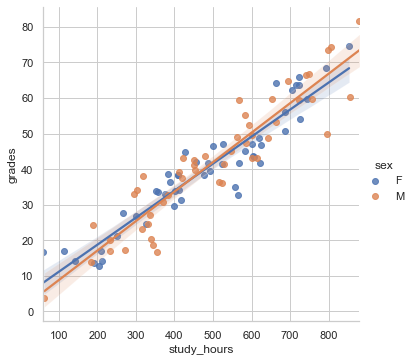

In [45]:
sns.lmplot(x='study_hours', y='grades', data=data, hue='sex');

## Extensions to the linear model

There are several assumptions that are used when fitting a linear model. 
* The errors are normally distributed and have constant variance
* The errors are not correlated with one another
* **Additive assumption** The effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values of the other predictors.
* **Linear assumption** The change in response for a one unit increase in $X_j$ is the same no matter what the value of $X_j$


### Challenging the additive assumption: synergy

Sometimes our variables will have natural interactions. For example, we might think that the more our ads are listened in the radio, the more effective our TV ads are. That is, the effect of both is *greater* (or *lesser*) than the sum of the parts.

[This is a commonly studied topic in marketing](https://smallbusiness.chron.com/definition-synergy-marketing-21786.html)

In [46]:
# interaction model
results = smf.ols('Sales ~ TV + Radio + TV * Radio', data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          6.68e-146
Time:                        12:51:01   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Remember the **Hierarchical principle:**

"*If we include an interaction in a model, we should also include the main effects, even if the p-values assiciated with their coefficients are not significant*"

In [47]:
data

,grades,study_hours,party_hours,sex,is_female
0,21.137187,251.876922,631.949658,F,1
1,39.729448,453.114167,528.033116,M,0
2,52.423200,594.307050,361.657413,M,0
3,43.411710,605.569393,602.621791,F,1
4,13.527008,191.436220,410.216518,F,1
...,...,...,...,...,...
95,65.994383,723.228693,693.498197,F,1
96,56.084981,687.479364,478.855086,F,1
97,33.503204,358.321376,287.768620,F,1
98,42.989335,420.797937,229.090229,M,0


**Exercise** [FAKE!]

Imagine there is a theory that states that partying out has more negative effect on females compared to males in terms of grades in the exams. That is, that there is a (negative) *synergetic* effect between both variables. Use the (mock) data to refute of validate this hypothesis.



In [48]:
# interaction model
results = smf.ols('grades ~ study_hours + party_hours + is_female + party_hours * is_female', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     291.2
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           2.12e-52
Time:                        12:51:03   Log-Likelihood:                -292.38
No. Observations:                 100   AIC:                             594.8
Df Residuals:                      95   BIC:                             607.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                15.0788      2.227      6.772      0.000      10.658      19.499
study_hours               0.0810      0.002     33.581      0.000       0.076       0.086
party_hours              -0.0256      0.003     -7.482      0.000      -0.032      -0.019
is_female                -7.2166      2.894     -2.493      0.014     -12.963      -1.470
party_hours:is_female     0.0126      0.005      2.410      0.018       0.002       0.023
==============================================================================
Omnibus:                        0.671   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.715   Jarque-Bera (JB):                0.537
Skew:                          -0.179   Prob(JB):                        0.764
Kurtosis:                       2.977   Cond. No.                     5.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Challenging the linear assumption: polynomial regression

In [49]:
# From the example in the previous class
beta_1 =  0.01#0.08
beta_0 = 12
num_points = 100
X = np.random.uniform(1,6, num_points) # study hours

# And the grades are...
y = beta_0 + (beta_1 * np.exp(X)) + np.random.normal(loc=0, scale=0.05, size=num_points)
data = pd.DataFrame({'grade': y,
                     'hours': X})

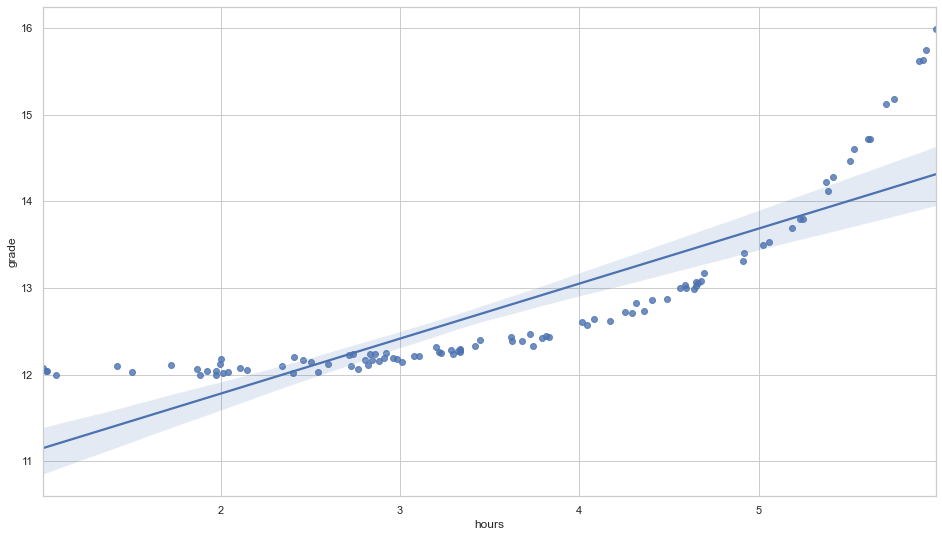

In [50]:
sns.regplot(x='hours', y='grade', data=data);

In [51]:
data.corr('pearson')

,grade,hours
grade,1.000000,0.857605
hours,0.857605,1.000000


In [52]:
# interaction model
results = smf.ols('grade ~ hours', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     272.5
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           4.68e-30
Time:                        12:51:05   Log-Likelihood:                -72.445
No. Observations:                 100   AIC:                             148.9
Df Residuals:                      98   BIC:                             154.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5107      0.146     71.966      0.000      10.221      10.801
hours          0.6346      0.038     16.507      0.000       0.558       0.711
==============================================================================
Omnibus:                       25.419   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.349
Skew:                           1.302   Prob(JB):                     3.48e-08
Kurtosis:                       4.211   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
data['hours_exp'] = np.exp(data['hours'])

In [54]:
data

,grade,hours,hours_exp
0,15.182595,5.753958,315.436603
1,12.068949,2.768227,15.930362
2,12.225334,2.715173,15.107217
3,12.386970,3.626907,37.596362
4,13.686538,5.187246,178.975036
...,...,...,...
95,12.032771,1.505219,4.505139
96,12.164299,2.805032,16.527602
97,13.798932,5.231204,187.017755
98,14.221563,5.376203,216.199839


In [55]:
# interaction model
results = smf.ols('grade ~ hours + hours_exp', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.865e+04
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          3.75e-126
Time:                        12:51:07   Log-Likelihood:                 158.80
No. Observations:                 100   AIC:                            -311.6
Df Residuals:                      97   BIC:                            -303.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9961      0.021    574.139      0.000      11.955      12.038
hours          0.0026      0.007      0.352      0.726      -0.012       0.017
hours_exp      0.0099      0.000     98.973      0.000       0.010       0.010
==============================================================================
Omnibus:                        2.273   Durbin-Watson:                   2.327
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                1.556
Skew:                           0.030   Prob(JB):                        0.459
Kurtosis:                       2.392   Cond. No.                         547.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model selection

### Adjusted $R^2$

There is a funny thing with $R^2$. Look at what happens when we include *Random* variables!!

In [56]:
df_adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [57]:
df_adv['rand_1'] = np.random.normal(size=200)
df_adv['rand_2'] = np.random.normal(size=200)
df_adv['rand_3'] = np.random.normal(size=200)
df_adv['rand_4'] = np.random.normal(size=200)
df_adv['rand_5'] = np.random.normal(size=200)
df_adv['rand_6'] = np.random.normal(size=200)
df_adv['rand_7'] = np.random.normal(size=200)
df_adv['rand_8'] = np.random.normal(size=200)

In [58]:
results = smf.ols('Sales ~ TV + Radio + TV * Radio + rand_1 + rand_2 + rand_3 + rand_4 + rand_5 + rand_6 + rand_7 + rand_8', 
                  data=df_adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     535.3
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          1.83e-135
Time:                        12:51:08   Log-Likelihood:                -266.11
No. Observations:                 200   AIC:                             556.2
Df Residuals:                     188   BIC:                             595.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7497      0.251     26.862      0.000       6.254       7.245
TV             0.0192      0.002     12.653      0.000       0.016       0.022
Radio          0.0296      0.009      3.297      0.001       0.012       0.047
TV:Radio       0.0011    5.3e-05     20.356      0.000       0.001       0.001
rand_1         0.0146      0.067      0.217      0.828      -0.118       0.147
rand_2        -0.0148      0.070     -0.211      0.833      -0.153       0.124
rand_3        -0.1350      0.064     -2.096      0.037      -0.262      -0.008
rand_4         0.0180      0.071      0.252      0.801      -0.123       0.159
rand_5        -0.0027      0.067     -0.040      0.968      -0.135       0.130
rand_6        -0.1058      0.071     -1.499      0.136      -0.245       0.033
rand_7        -0.0495      0.075     -0.661      0.509      -0.197       0.098
rand_8         0.0570      0.071      0.800      0.425      -0.084       0.198
==============================================================================
Omnibus:                      120.663   Durbin-Watson:                   2.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1051.235
Skew:                          -2.164   Prob(JB):                    5.34e-229
Kurtosis:                      13.364   Cond. No.                     1.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The `Adj. R-squared` coefficient is meant to penalize the $R^2$ of a model when including *too many* varaibles. 
$$\bar R^2 = 1-(1-R^2){n-1 \over n-p-1}$$

There are other statistics to reflect the quality of a model auch as `AIC` ([Akaike Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion)) and the `BIC` ([Bayesian Information Criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion)) --- did you noticed these names in the results from statsmodels? In both cases, the lowest the better.



### Stepwise selection

One should always aim to have a model as simple as possible! We will other ways of doing this using **regularization**, but so far the methods we describe here are rather useful!

#### Best subset selection

1. Start with a model with no predictors (just the intercept). This model is $\mathcal{M_0}$ 
2. for $k = 0,1,..., p-1$
    * consider all ${p \choose k}$ models that contain exactly one predictor
    * choose the *best* among these ${p \choose k}$ models, and call it $\mathcal{M_{k+1}}$. Here best is defined as having the smallest $RSS$ of highest $R^2$.
3. Select the single best model among $\mathcal{M_0}, \dots, \mathcal{M_p}$ using either $R_{adj}^2$, $BIC$, or $AIC$.

#### Forward stepwise selection

1. Start with a model with no predictors (just the intercept). This model is $\mathcal{M_0}$ 
2. for $k = 0,1,..., p-1$
    * consider all $p-k$ models that augment the predictors in $\mathcal{M_k}$  with one additional predictor.
    * choose the *best* among these $p-k$ models, and call it $\mathcal{M_{k+1}}$. Here best is defined as having the smallest $RSS$ of highest $R^2$.
3. Select the single best model among $\mathcal{M_0}, \dots, \mathcal{M_p}$ using either $R_{adj}^2$, $BIC$, or $AIC$.

In [59]:
#TODO
df_forward_selection = pd.DataFrame()


,TV,Radio,Newspaper,Sales,rand_1,rand_2,rand_3,rand_4,rand_5,rand_6,rand_7,rand_8
0,230.1,37.8,69.2,22.1,-0.475029,0.505249,1.633071,0.545962,-1.897094,-1.332980,-1.766265,-0.726316
1,44.5,39.3,45.1,10.4,0.736727,-1.324178,-1.233509,-1.872467,1.318286,1.188021,-0.778286,-0.928475
2,17.2,45.9,69.3,9.3,-2.031772,0.711846,0.168445,-0.166924,-0.416792,1.329866,0.843906,0.230107
3,151.5,41.3,58.5,18.5,0.304055,0.157139,-0.565139,0.726512,1.265514,0.494276,-0.182293,-1.280915
4,180.8,10.8,58.4,12.9,-0.202139,-0.896499,1.536467,-0.247681,1.289550,-0.632126,-0.258969,-0.522772
...,...,...,...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,0.686153,0.266821,1.043842,0.107959,0.733528,0.576520,-0.574486,-1.643904
196,94.2,4.9,8.1,9.7,-0.821512,0.918880,0.060028,-0.564889,1.591707,1.097204,-0.577798,-1.122098
197,177.0,9.3,6.4,12.8,0.216309,-0.344907,0.133539,-1.695880,-0.683977,-2.219466,1.300896,0.011589
198,283.6,42.0,66.2,25.5,-1.387185,-1.738162,0.686474,0.144184,0.172390,1.365894,0.135337,-1.516557


## Potential problems in Linear Regression

The main assumptions of a linear model are:

* Data is linear 
* Errors are not correlated
* Variance of error terms is constant

What if these assumptions are not met?? 

Additionally, our models may suffer from other issues such as:
* Outliers
* High Leverage points
* Collinearity
* Missing values

Watch this [video](https://www.youtube.com/watch?v=hVe2F9krrWk) for an introduction to the topic.
Read section 3.3.3 of the book [Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf).

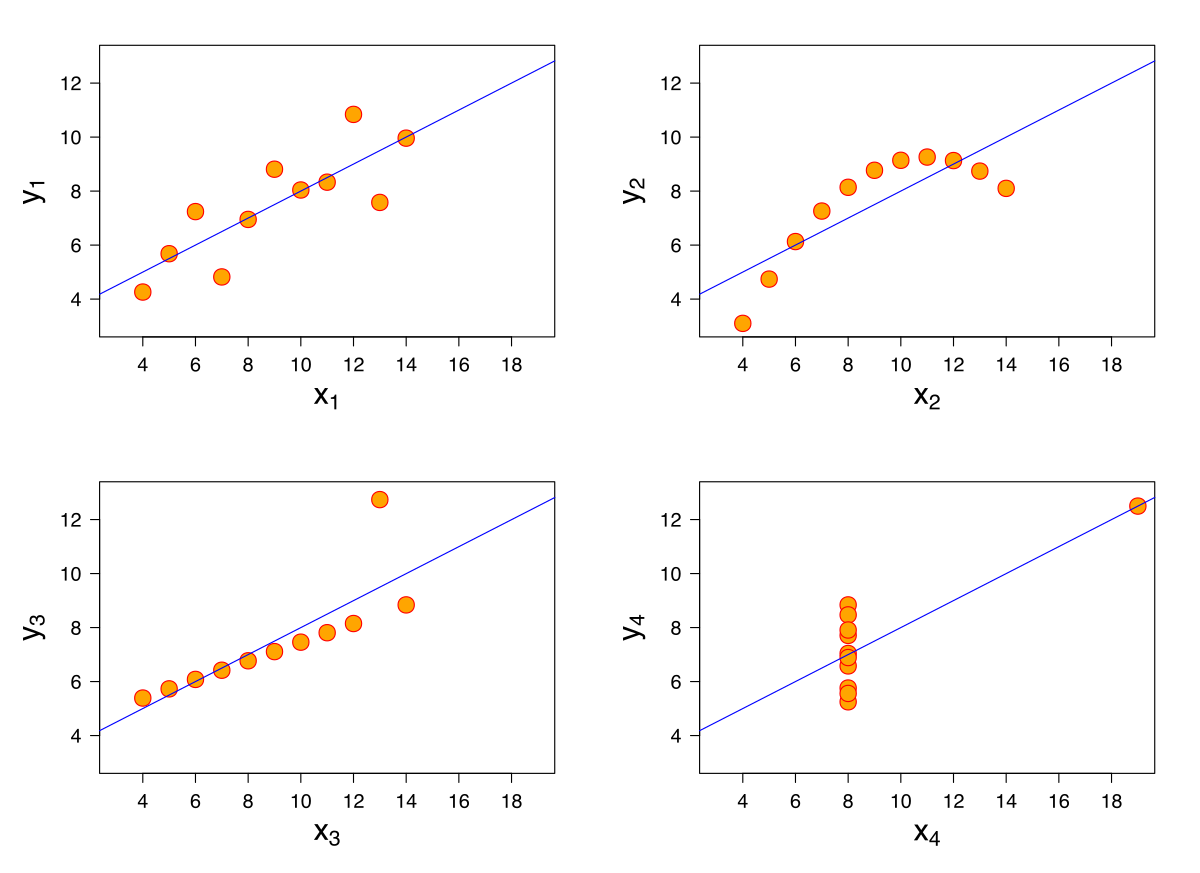

See [Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

# Mini-project

Your goal will be to predict the prices in the [Boston Houses dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Using everything you have learnt so far about linear regression!

See [repo](https://github.com/agalvezcorell/linear-regression-boston-housing/blob/main/mini-project.ipynb).

And the winner was!:

# References: 

* [Introduction to Statistical Learning (Chapter 3)](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)
* One example of [linear regression with the Boston data set](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)